In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
timeseries_tests = pd.DataFrame(requests.get("https://covidtracking.com/api/states/daily").json())
timeseries_tests['stateName'] = timeseries_tests.state
timeseries_tests['dateColumn'] = pd.to_datetime(timeseries_tests.dateChecked)
timeseries_tests = timeseries_tests.sort_values('dateColumn')

In [4]:
grouped_timeseries = timeseries_tests.groupby(['state', 'dateChecked']).min()

In [5]:
grouped_timeseries['positive_ratio'] = grouped_timeseries.positive / grouped_timeseries.total

In [6]:
_states = {
#     'FL': 'green',
    'NY': 'red',
    'CA': 'yellow',
    'WA': 'blue',
#     'MD': 'orange',
}

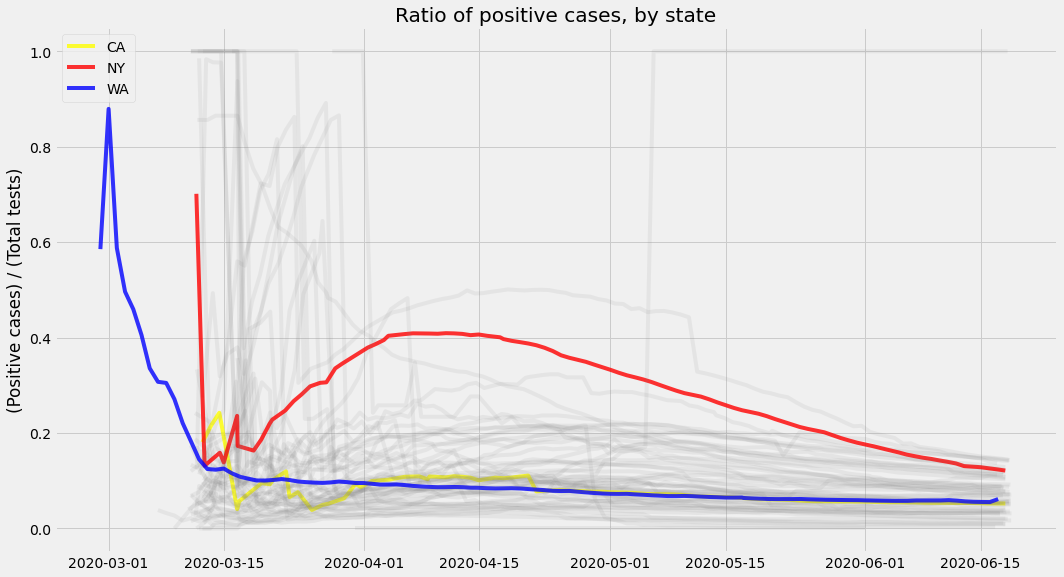

In [7]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].positive_ratio,
            c = _states[state] if state in _states else 'grey',
            alpha = 0.8 if state in _states else 0.1,
            label = state if state in _states else None
        )
    plt.title("Ratio of positive cases, by state")
    plt.ylabel("(Positive cases) / (Total tests)")
    plt.legend()
    plt.show()

/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()
/Users/mateljk1/.pyenv/versions/3.7.7/envs/scripting/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  # This is added back by InteractiveShellApp.init_path()


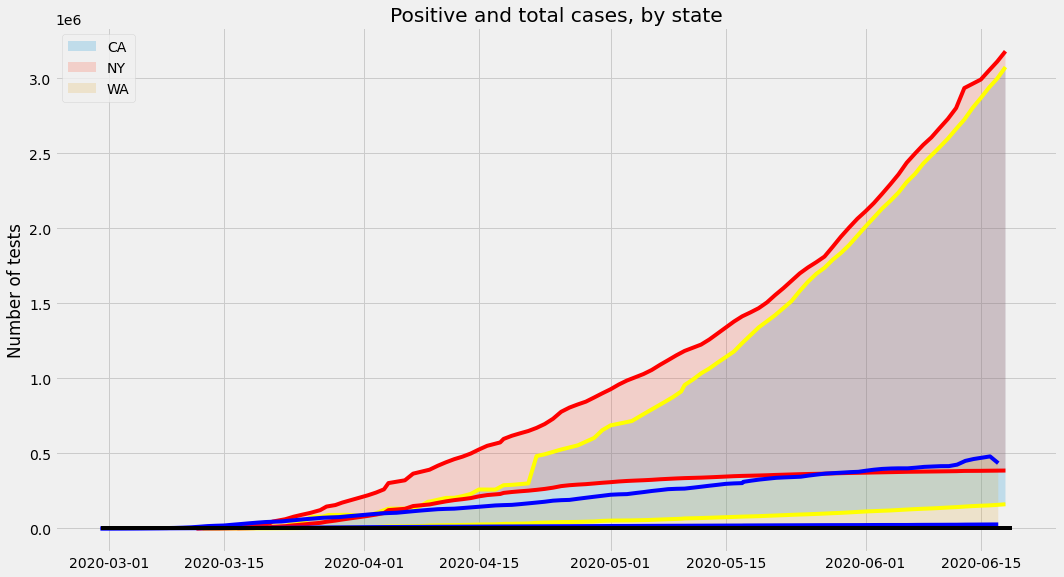

In [8]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(16, 9))
    for state in list(grouped_timeseries.stateName.unique()):
        if state in _states:
            plt.fill_between(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=0.2,
                label=state
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].total,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
            plt.plot(
                grouped_timeseries.loc[state, :].dateColumn,
                grouped_timeseries.loc[state, :].positive,
                _states[state] if state in _states else 'grey',
                alpha=1,
                label=None
            )
        plt.plot(
            grouped_timeseries.loc[state, :].dateColumn,
            grouped_timeseries.loc[state, :].total * 0,
            c='black',
            alpha=1, label=None
        )

    plt.legend(loc='upper left')
    plt.title("Positive and total cases, by state")
    plt.ylabel("Number of tests")
    plt.show()    

In [9]:
grouped_timeseries.loc['CA', :]

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,stateName,dateColumn,positive_ratio
dateChecked,,,,,,,,,,,,,,,,,,,,,
2020-03-12T10:00:00Z,20200312,202.0,916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,a5958003b02895d2c201b5eb7d5f91ff99a914d2,0,0,0,0,0,,CA,2020-03-12 10:00:00+00:00,0.180680
2020-03-13T11:00:00Z,20200314,252.0,916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,daccf033657b650363579245b6bccf6f79de439f,0,0,0,0,0,,CA,2020-03-13 11:00:00+00:00,0.215753
2020-03-14T11:00:00Z,20200315,293.0,916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19feb15c0e72c7a0e5f6b967b2bd199c59786d9c,0,0,0,0,0,,CA,2020-03-14 11:00:00+00:00,0.242349
2020-03-16T15:10:00Z,20200316,335.0,7981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131d010d9174cd87f36cdd3bc4bfb01f75f858be,0,0,0,0,0,,CA,2020-03-16 15:10:00+00:00,0.040284
2020-03-16T21:00:00Z,20200317,483.0,7981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85f2108e41ae633644e910f0d46fd7c20dc4bb7b,0,0,0,0,0,,CA,2020-03-16 21:00:00+00:00,0.057065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-14T00:00:00Z,20200614,148855.0,2653141.0,NaN,4247.0,NaN,1280.0,NaN,NaN,NaN,...,5bdf68836b6e269941b2d98ae4c4080e7658dc24,0,0,0,0,0,,CA,2020-06-14 00:00:00+00:00,0.053125
2020-06-15T00:00:00Z,20200615,151452.0,2716730.0,NaN,4323.0,NaN,1270.0,NaN,NaN,NaN,...,952aeb311c1f15712a48b9a9fdea0b9cf8563476,0,0,0,0,0,,CA,2020-06-15 00:00:00+00:00,0.052804
2020-06-16T00:00:00Z,20200616,153560.0,2784195.0,NaN,4462.0,NaN,1272.0,NaN,NaN,NaN,...,197ed439c7319257cbb5ccd48da4e0e5f364d387,0,0,0,0,0,,CA,2020-06-16 00:00:00+00:00,0.052271
